# Simple Linear Regression
#### Simple Linear Regression means x has only one value.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load the dataset

In [2]:
data = pd.read_csv('dataset.csv')

## Split X, y

In [3]:
X = data[['Age']]
y = data['SBP']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Visualize dataset

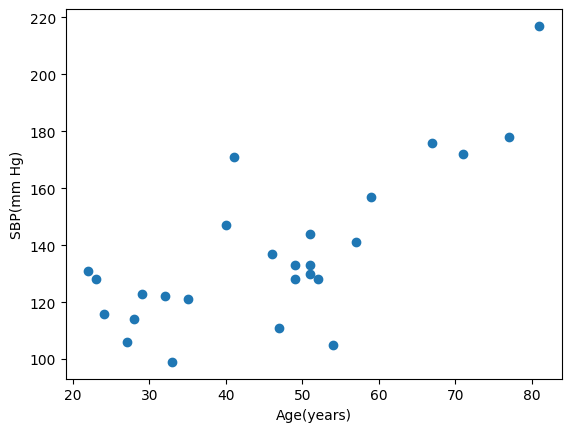

In [4]:
plt.scatter(x_train, y_train)
plt.xlabel('Age(years)')
plt.ylabel('SBP(mm Hg)')
plt.show()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(26, 1)
(26,)
(7, 1)
(7,)


## Normalize data

In [6]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_train_scaled = x_scaler.fit_transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

## Plot normalized data

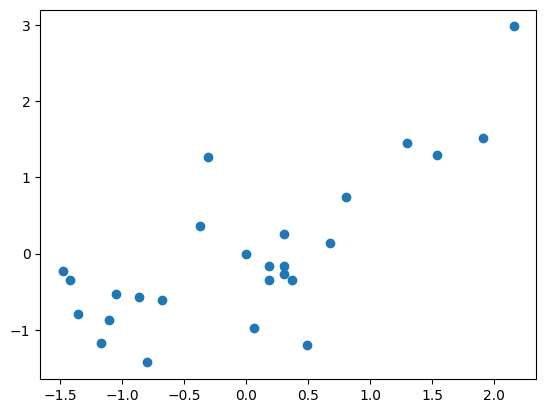

In [7]:
plt.scatter(x_train_scaled, y_train_scaled)
plt.show()

## Train model

In [8]:
model = LinearRegression()
model.fit(x_train_scaled, y_train_scaled)

line = 'SBP = %.3f + %.3f*Age' %(model.intercept_, model.coef_[0])

print('Weight of model: ', model.coef_.item())
print('Bias of model: ', model.intercept_.item())

Weight of model:  0.7412798625771629
Bias of model:  1.5372318802502167e-16


## Plot model

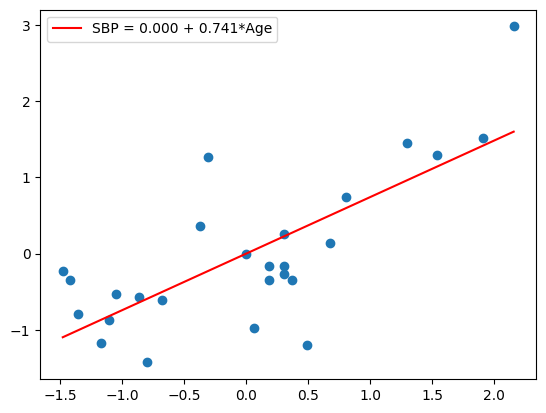

In [9]:
x_line = np.linspace(min(x_train_scaled), max(x_train_scaled))
y_line = model.predict(x_line)

plt.plot(x_line, y_line, color='red', label=line)
plt.scatter(x_train_scaled, y_train_scaled)
plt.legend()
plt.show()

## Evaluate model performance

In [10]:
y_pred_scaled = model.predict(x_test_scaled)

print('MAE:', mean_absolute_error(y_test_scaled, y_pred_scaled))
print('RMSE:', np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled)))
print('R²:', r2_score(y_test_scaled, y_pred_scaled))

MAE: 0.44090053188162515
RMSE: 0.6872591319932398
R²: 0.2850814199298163
